## Lasso Regression

In [16]:
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [5]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [6]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

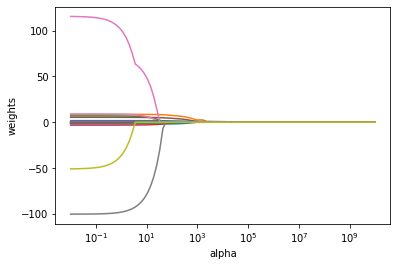

In [7]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

### Predict

In [9]:
y_pred = lasso_model.predict(X_test)
y_pred[0:10]

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406])

In [10]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.7545270148771

In [14]:
y_pred = lasso_model.predict(X_train)

In [13]:
np.sqrt(mean_squared_error(y_train,y_pred))

289.3655052843862

In [15]:
r2_score(y_train, y_pred)

0.5769016048914699

### Model Tuning

In [17]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [18]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [20]:
lasso_cv_model.alpha_

0.39406126432470073

In [22]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [23]:
lasso_tuned

Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
y_pred = lasso_tuned.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.52263769583686

In [26]:
y_pred = lasso_tuned.predict(X_train)

In [27]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3772303515828

In [28]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))

356.52263769583686